In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import random
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:


df = image_dataset_from_directory(
    "my_dataset/",
    image_size = (28, 28),
    color_mode = "grayscale",
    label_mode = "int",
    shuffle = True
)

Found 100 files belonging to 5 classes.


In [3]:

X_all = []
y_all = []

for images, labels in df:
    X_all.append(images.numpy())
    y_all.append(labels.numpy())

X = np.concatenate(X_all)
y = np.concatenate(y_all)


In [4]:
X_train, y_train, X_test, y_test = X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train = X_train / 255.0 
X_test = X_test / 255.0 

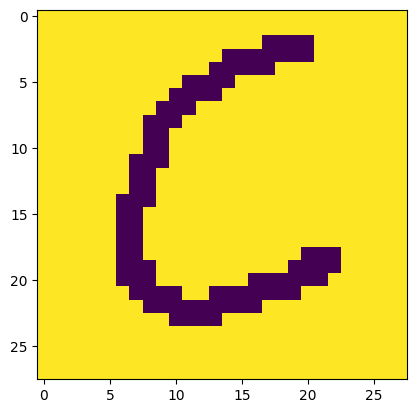

In [5]:
index = random.randint(0, len(y_test))
plt.imshow(X_test[index, : ])

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3, 3), input_shape = (28, 28, 1), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32,(3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(5, activation = "sigmoid"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test,y_test))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9195 - loss: 0.2531 - val_accuracy: 0.9000 - val_loss: 0.2562
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9797 - loss: 0.1583 - val_accuracy: 0.8500 - val_loss: 0.3715
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9594 - loss: 0.1359 - val_accuracy: 0.9000 - val_loss: 0.3295
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9219 - loss: 0.1900 - val_accuracy: 0.9000 - val_loss: 0.2266
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9516 - loss: 0.1494 - val_accuracy: 0.9000 - val_loss: 0.2181
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9438 - loss: 0.1606 - val_accuracy: 0.9000 - val_loss: 0.2466
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9438 - loss: 0.1541 - val_accuracy: 0.9000 - val_loss: 0.2849
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9516 - loss: 0.1389 - val_accuracy: 0.9000 - val_loss: 0.2798


In [18]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9000 - loss: 0.3728


[0.37278512120246887, 0.8999999761581421]

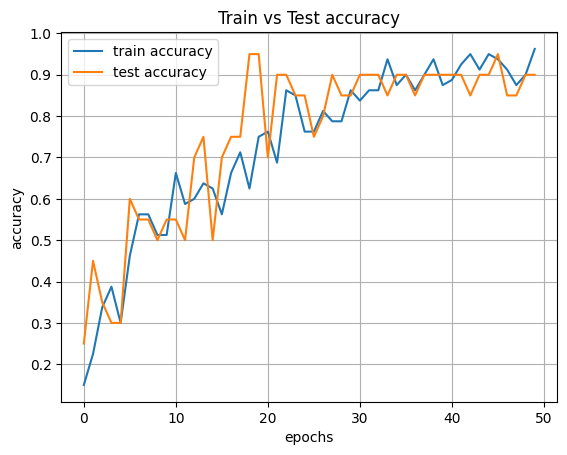

In [11]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "test accuracy")
plt.title("Train vs Test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


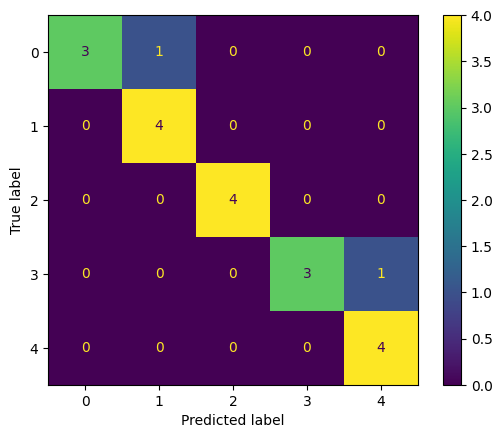

In [15]:
y_pred_probs = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred_probs, axis=1)

if len(y_test.shape) > 1:
    y_true_labels = np.argmax(y_test, axis=1)
else:
    y_true_labels = y_test

cm = confusion_matrix(y_true_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()